In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [7]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [2]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test =X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

## 정답을 바이너리화 함. one-hot encoding
Y_train_onehot = tf.keras.utils.to_categorical(Y_train)
Y_test_onehot = tf.keras.utils.to_categorical(Y_test)

In [9]:
Y_train[0]

5

In [10]:
Y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [3]:
# CNN 모델 설계.
## 모델
input_Layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_Layer)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides = 1, activation='relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
Out_Layer=tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
#metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
              optimizer = optimizer,
              metrics= ['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0     

In [4]:
# 모델 최적화 설정
MODEL_DIR = './CNN_MNIST_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)]

In [5]:
# 모델의 실행
history = model.fit(X_train, Y_train_onehot, validation_split=0.2, epochs=50, batch_size=200, verbose=1, callbacks = callback_list)

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test_onehot)[1]))

Epoch 1/50
235/240 [============================>.] - ETA: 0s - loss: 3.1509 - accuracy: 0.6962
Epoch 1: val_loss improved from inf to 0.63127, saving model to ./CNN_MNIST_model/01-0.6313.hdf5
240/240 [==============================] - 9s 8ms/step - loss: 3.0997 - accuracy: 0.6999 - val_loss: 0.6313 - val_accuracy: 0.8882
Epoch 2/50
 20/240 [=>............................] - ETA: 1s - loss: 0.5746 - accuracy: 0.8888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


237/240 [============================>.] - ETA: 0s - loss: 0.4733 - accuracy: 0.9107
Epoch 2: val_loss improved from 0.63127 to 0.37409, saving model to ./CNN_MNIST_model/02-0.3741.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 0.4709 - accuracy: 0.9110 - val_loss: 0.3741 - val_accuracy: 0.9292
Epoch 3/50
231/240 [===========================>..] - ETA: 0s - loss: 0.2935 - accuracy: 0.9407
Epoch 3: val_loss improved from 0.37409 to 0.28148, saving model to ./CNN_MNIST_model/03-0.2815.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 0.2905 - accuracy: 0.9411 - val_loss: 0.2815 - val_accuracy: 0.9441
Epoch 4/50
234/240 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9547
Epoch 4: val_loss improved from 0.28148 to 0.23088, saving model to ./CNN_MNIST_model/04-0.2309.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 0.2105 - accuracy: 0.9550 - val_loss: 0.2309 - val_accuracy: 0.9525
Epoch 5/50
240/240 [=======

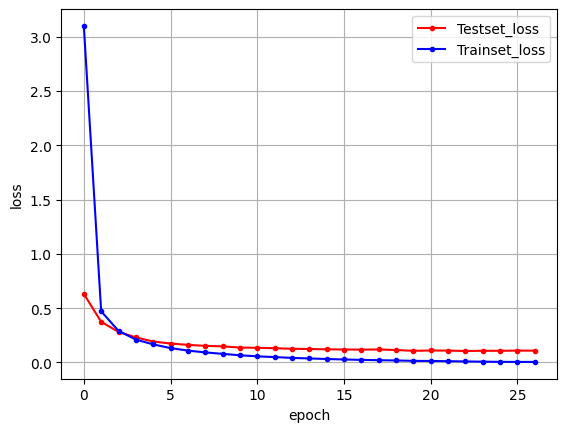

In [6]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
